<a href="https://colab.research.google.com/github/AmishiR/ML-Lab/blob/main/ML_Lab_07_part_A_Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ML_Lab7_Decisio Trees

Objectives of the Lab

By the end of this lab, students will be able to:

1.Understand Decision Trees

Grasp the intuition of how decision trees split data using features.

Learn the concepts of impurity (Gini, Entropy) and splitting criteria.

2.Apply Decision Trees to Real Data (Titanic dataset)

Perform data cleaning, handling missing values, and encoding categorical variables.

Train a full, unpruned decision tree and observe overfitting.

3.Implement Pre-pruning

Use hyperparameters (max_depth, min_samples_split, min_samples_leaf, etc.) to restrict tree growth.

Evaluate how pre-pruning affects bias, variance, and interpretability.

4.Implement Post-pruning (Cost-Complexity Pruning)

Use ccp_alpha and cross-validation to prune an overfitted tree.

5.Compare model complexity and performance before and after pruning.

6.Evaluate Models

Compute accuracy, precision, recall, and F1-score.

Visualize confusion matrices, ROC and PR curves.

Interpret decision rules (e.g., survival factors in Titanic).

Procedures of the Lab
1.Load and Explore the Dataset

2.Load Titanic dataset from GitHub/CSV.

3.Perform Exploratory Data Analysis (EDA): view columns, check datatypes, describe statistics, and identify missing values.

4.Data Preprocessing

Handle missing values (median for Age, mode for Embarked, drop Cabin).

Encode categorical variables (Sex, Embarked) using One-Hot Encoding.

5.Split into train/test sets using train_test_split(stratify=y) for balanced classes.

6.Train an Unpruned Decision Tree

Fit a DecisionTreeClassifier with default parameters (max_depth=None).

Measure training vs testing accuracy to demonstrate overfitting.

Visualize the full tree with plot_tree.

7.Pre-pruning

Train decision trees with different max_depth, min_samples_leaf, and min_samples_split.

Compare accuracy and complexity (depth, leaves).

Use GridSearchCV to find the best parameters.

Interpret rules from the pre-pruned tree.

8.Post-pruning

Grow a full tree first.

Use cost_complexity_pruning_path to obtain candidate ccp_alpha values.

Cross-validate to find the best ccp_alpha.

Fit the pruned tree and compare with the full tree (accuracy, depth, leaves).

9.Model Evaluation

Print classification reports (precision, recall, F1).

Plot confusion matrices (Seaborn heatmap).

Plot Precision–Recall and ROC curves.

10.Interpret results: identify which features (sex, class, age, fare) drive survival predictions.

11.Conclusion

Summarize findings on overfitting/unpruning vs pruning.

Highlight trade-offs: complexity vs generalization.

Discuss interpretability of trees in real-world decision making.

In [ ]:
## Part 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error


In [ ]:
## Part 2: Classification Example – Titanic Dataset

# Load Titanic dataset
titanic = pd.read_csv('/content/titanic.csv')
titanic.shape

(891, 12)

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


df.shape        # (rows, columns)

df.columns      # list of column names

df.info()       # column types + non-null counts

df.head()       # first 5 rows

df.tail()       # last 5 rows

df.sample(5)    # 5 random rows

df.isna().sum()        # count of missing values per column

df.duplicated().sum()  # number of duplicate rows

df.describe()           # summary stats (numeric only)

df.describe(include='O') # summary for categorical features
df.isna().sum()        # count of missing values per column

df.duplicated().sum()  # number of duplicate rows

df['survived'].value_counts()

df['survived'].value_counts(normalize=True)  # as proportions

In [ ]:
titanic.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,NaN,S
363,364,0,3,"Asim, Mr. Adola",male,35.0,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
123,124,1,2,"Webber, Miss. Susan",female,32.5,0,0,27267,13.0000,E101,S
805,806,0,3,"Johansson, Mr. Karl Johan",male,31.0,0,0,347063,7.7750,NaN,S
660,661,1,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,133.6500,NaN,S
467,468,0,1,"Smart, Mr. John Montgomery",male,56.0,0,0,113792,26.5500,NaN,S
666,667,0,2,"Butler, Mr. Reginald Fenton",male,25.0,0,0,234686,13.0000,NaN,S
388,389,0,3,"Sadlier, Mr. Matthew",male,NaN,0,0,367655,7.7292,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
536,537,0,1,"Butt, Major. Archibald Willingham",male,45.0,0,0,113050,26.5500,B38,S


check the requirement of encoding and decide the number of features to be used for modeling   Decide which columns to drop

PassengerId → just a running index, no predictive value →  drop

Name → free-text, messy; can be engineered into “Title” feature, but for now →  drop

Ticket → messy alphanumeric, little signal (unless feature engineered) →  drop

Cabin → too many missing values (687/891 missing) →  drop

So we keep:

Survived (target)

Pclass (class of travel, ordinal feature → can keep numeric or encode) numeric (1, 2, 3) but actually represents passenger class (categorical) → can be:left as numeric (tree-based models can split on it directly), OR one-hot encoded (to treat it purely categorical)

Sex categorical (male/female) → needs encoding

Age (numeric, impute missing)→ no encoding needed

SibSp (# siblings/spouses aboard, numeric)no encoding needed

Parch (# parents/children aboard, numeric) no encoding needed

Fare (numeric, skewed but fine for trees)

Embarked categorical (C, Q, S) → needs encoding


In [ ]:
# Drop irrelevant columns
titanic_clean = titanic.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

In [ ]:
# impute missing values
titanic_clean['Age'] = titanic_clean['Age'].fillna(titanic_clean['Age'].median())
titanic_clean['Embarked'] = titanic_clean['Embarked'].fillna(titanic_clean['Embarked'].mode()[0])

df['Embarked'] Selects the Embarked column from the DataFrame.This column tells us the port where a passenger boarded: C = Cherbourg Q = Queenstown
S = Southampton

df['Embarked'].mode()    Finds the most frequent value(s) in the column (the “mode”).Example: If most passengers boarded at Southampton (S), then:

df['Embarked'].mode()    # Output: 0    S  #dtype: object


df['Embarked'].mode()[0]  
Extracts the first mode value (in case there are ties).Here, it will be "S".

.fillna(df['Embarked'].mode()[0])

Replaces all NaN (missing) values in Embarked with "S".
df['Embarked'] = ...Assigns the filled column back into the DataFrame, updating it.

Encoding 1)Using Pandas get_dummies,2)Using Scikit-Learn OneHotEncoder,                  3)Using .cat.codes (Label Encoding)

 Use only with tree-based models (Decision Tree, RandomForest, XGBoost), not with linear model

In [ ]:
# One-hot encode categorical variables
titanic_encoded = pd.get_dummies(titanic_clean, columns=['Sex','Embarked'], drop_first=True)
print(titanic_encoded.head())

   Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  \
0         0       3  22.0      1      0   7.2500      True       False   
1         1       1  38.0      1      0  71.2833     False       False   
2         1       3  26.0      0      0   7.9250     False       False   
3         1       1  35.0      1      0  53.1000     False       False   
4         0       3  35.0      0      0   8.0500      True       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  


In [ ]:
# Simple preprocessing
X = titanic_encoded[['Pclass','Pclass','Age','SibSp','Parch','Fare','Sex_male','Embarked_Q']]
y= titanic_encoded['Survived']

X.head()
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [ ]:
# Split data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
train_test_split(X, y, test_size=0.2,random_state=42)

[     Pclass  Pclass   Age  SibSp  Parch      Fare  Sex_male  Embarked_Q
 331       1       1  45.5      0      0   28.5000      True       False
 733       2       2  23.0      0      0   13.0000      True       False
 382       3       3  32.0      0      0    7.9250      True       False
 704       3       3  26.0      1      0    7.8542      True       False
 813       3       3   6.0      4      2   31.2750     False       False
 ..      ...     ...   ...    ...    ...       ...       ...         ...
 106       3       3  21.0      0      0    7.6500     False       False
 270       1       1  28.0      0      0   31.0000      True       False
 860       3       3  41.0      2      0   14.1083      True       False
 435       1       1  14.0      1      2  120.0000     False       False
 102       1       1  21.0      0      1   77.2875      True       False
 
 [712 rows x 8 columns],
      Pclass  Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q
 709       3       3  28.

In [ ]:
#Compare class balance (important in Titanic!)
#Ensures stratification worked (both splits should have similar % survival).
print("Train target distribution:")
print(y_train.value_counts(normalize=True))

print("\nTest target distribution:")
print(y_test.value_counts(normalize=True))

Train target distribution:
Survived
0    0.629213
1    0.370787
Name: proportion, dtype: float64

Test target distribution:
Survived
0    0.585821
1    0.414179
Name: proportion, dtype: float64


without stratification the split is random.

That means your train set might have, say, 40% survivors, while your test set might have only 25%.

If the survival ratio is different between train and test, the model may look worse or better than it really is, because it’s tested on a dataset with a different balance of classes. stratify=y tells scikit-learn:
“Preserve the same proportion of 0s (not survived) and 1s (survived) in both train and test.”

So if the whole dataset has ~62% not survived and ~38% survived, both train and test will keep that same ratio.

This makes training and evaluation fair and consistent.

In [ ]:
#Check shapes
print("X_train:", X_train.shape)
print("X_test :", X_test.shape)
print("y_train:", y_train.shape)
print("y_test :", y_test.shape)

X_train: (623, 8)
X_test : (268, 8)
y_train: (623,)
y_test : (268,)


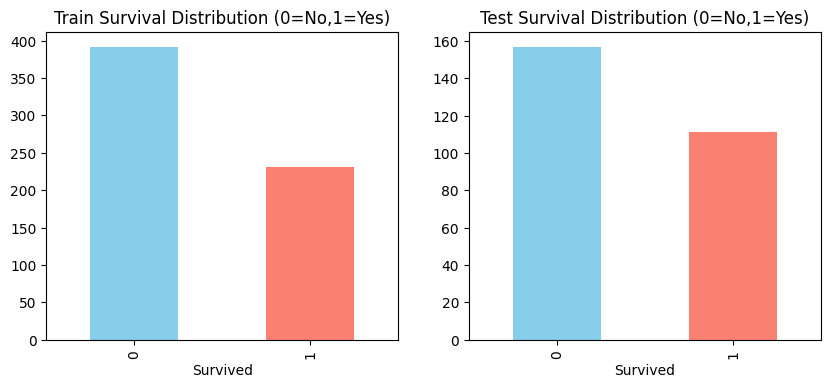

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2, figsize=(10,4))

y_train.value_counts().plot(kind='bar', ax=ax[0], color=['skyblue','salmon'])
ax[0].set_title("Train Survival Distribution (0=No,1=Yes)")

y_test.value_counts().plot(kind='bar', ax=ax[1], color=['skyblue','salmon'])
ax[1].set_title("Test Survival Distribution (0=No,1=Yes)")

plt.show()

In [ ]:
# Train Decision Tree Classifier (Unpruned) Train full tree (no constraints)
 # max_depth=None by default
full_tree = DecisionTreeClassifier(random_state=42)
full_tree.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

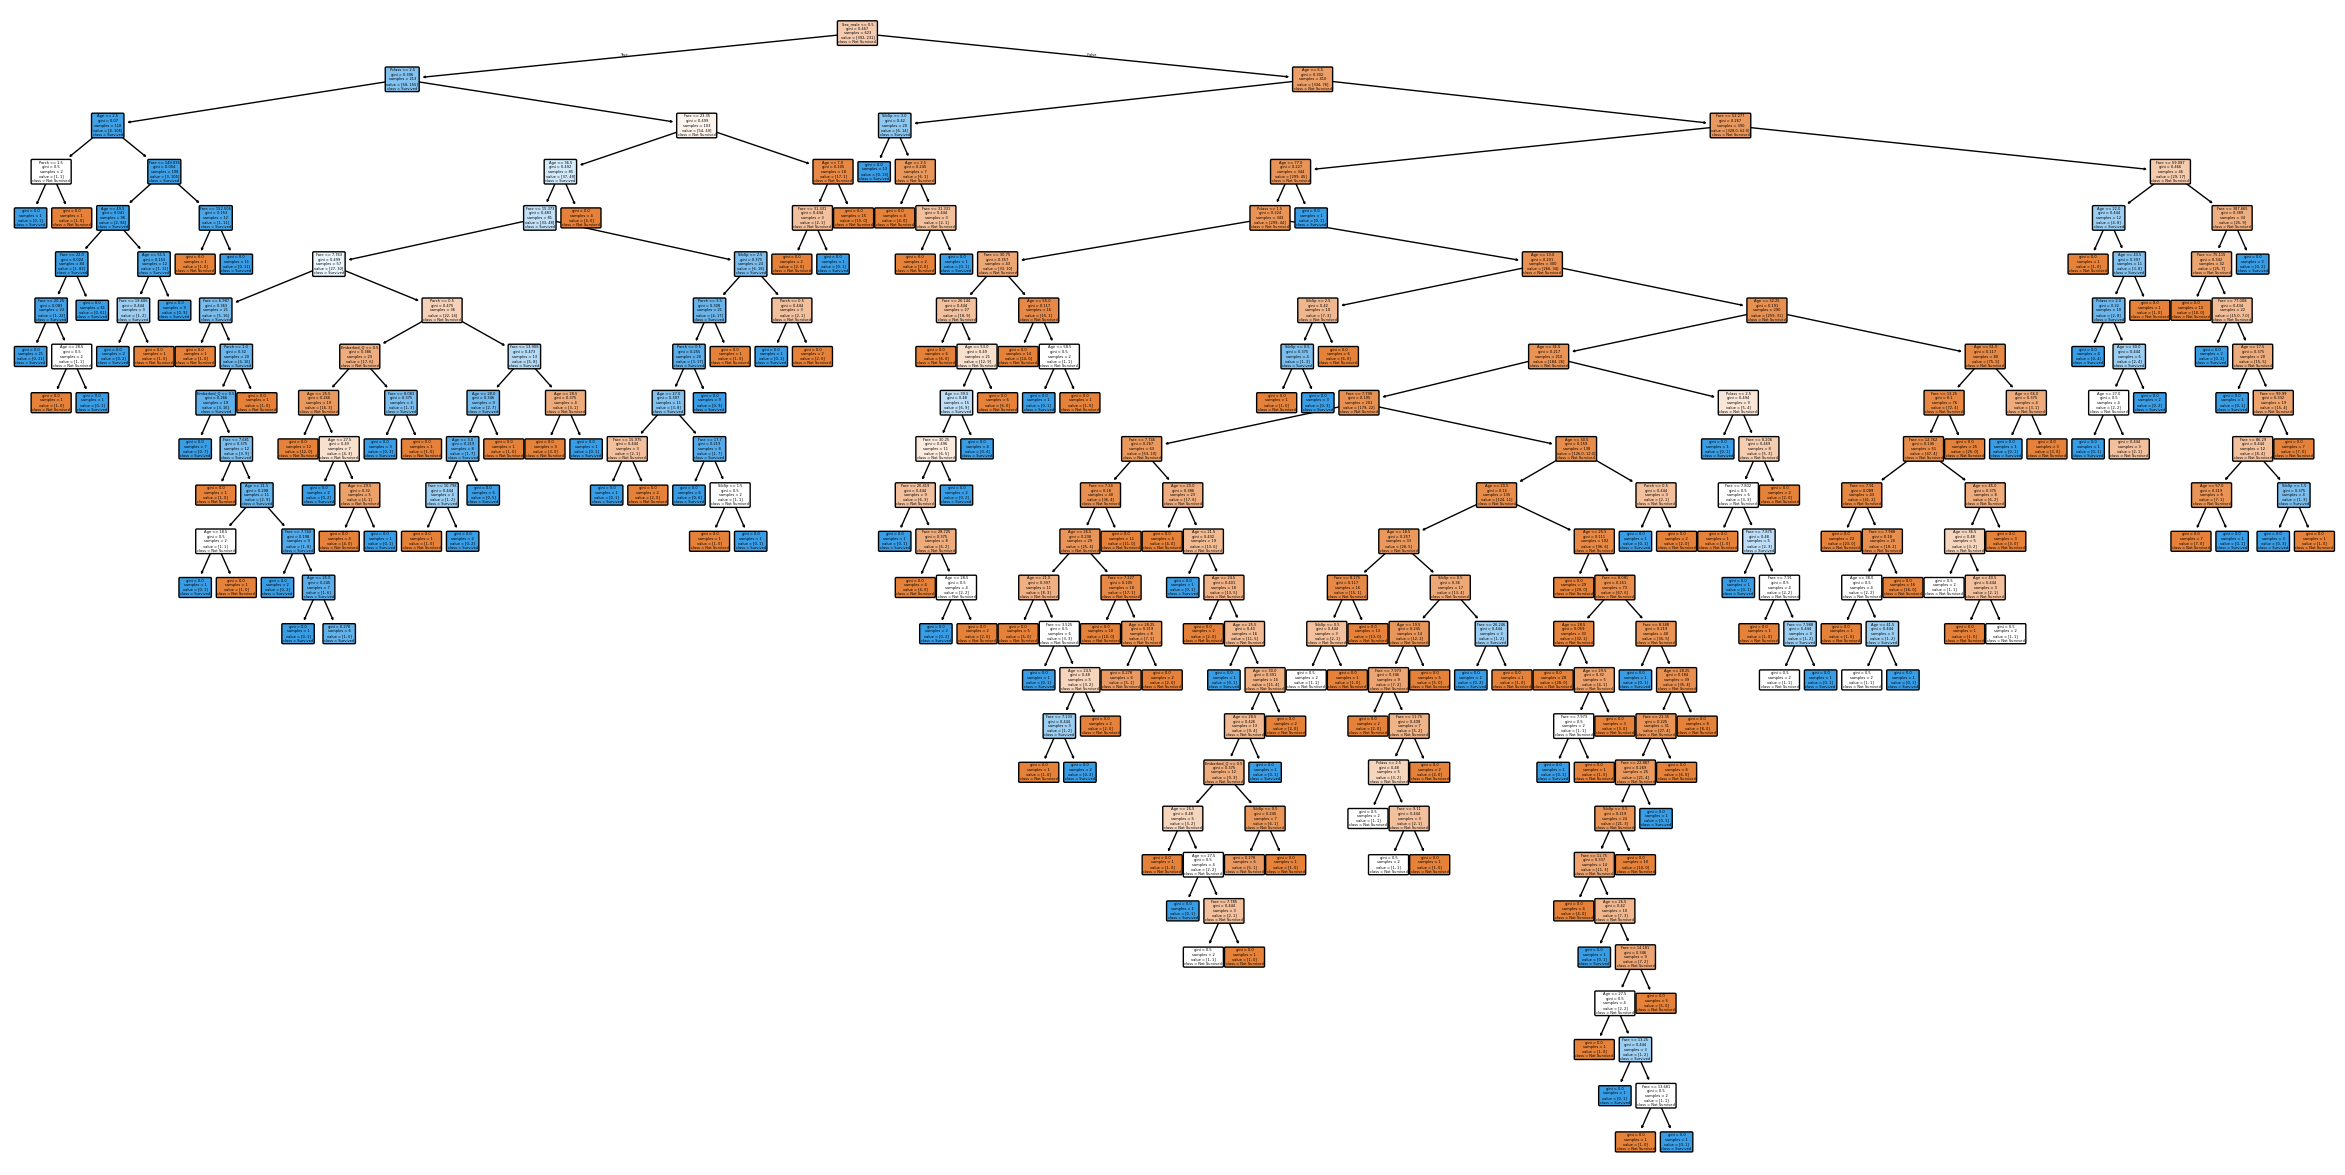

In [ ]:
#  plot the tree import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(30,15))  # make figure large
plot_tree(full_tree,
          feature_names=X.columns,
          class_names=["Not Survived","Survived"],
          filled=True, rounded=True)
plt.show()

In [ ]:
#Depth = longest path from root to leaf (how many splits the deepest branch has).

# Leaves = number of terminal nodes (end points where the tree stops splitting).
print("Tree Depth:", full_tree.get_depth())
print("Number of Leaves:", full_tree.get_n_leaves())

Tree Depth: 24
Number of Leaves: 149


In [ ]:
y_pred=full_tree.predict(X_test)

print("accuracy",accuracy_score(y_test,y_pred))

accuracy 0.7649253731343284


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
# Predictions on test set
y_pred = full_tree.predict(X_test)

# Accuracy
print("Test Accuracy:", round(accuracy_score(y_test, y_pred), 3))

Test Accuracy: 0.765



Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.82      0.80       157
           1       0.73      0.68      0.71       111

    accuracy                           0.76       268
   macro avg       0.76      0.75      0.76       268
weighted avg       0.76      0.76      0.76       268



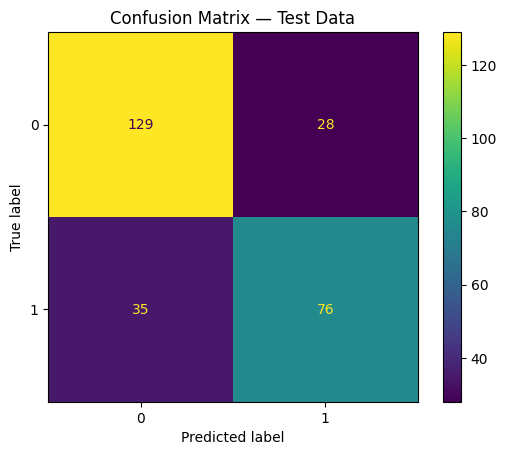

In [ ]:
# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(values_format='d')
plt.title("Confusion Matrix — Test Data")
plt.show()

Precision = out of all predicted as that class, how many are correct.
For class 0: 79% of predicted “not survived” were correct.

For class 1: 73% of predicted “survived” were correct.

Recall = out of all true examples of that class, how many did we catch.

For class 0: caught 82% of actual “not survived”.

For class 1: caught 68% of actual “survived”.

→ The model is worse at identifying survivors (misses about 32%).

F1-score = balance of precision & recall.
Similar for both classes (~0.7–0.8).

Accuracy = overall correctness → 76%.

Confusion Matrix

Top-left (129) = True Negatives → correctly predicted “not survived”.

Top-right (28) = False Positives → predicted “survived” but actually “not survived”.

Bottom-left (35) = False Negatives → predicted “not survived” but actually “survived”.

Bottom-right (76) = True Positives → correctly predicted “survived”.

👉 The main issue: 35 survivors were missed (false negatives), showing recall for class 1 is weaker.

✅ Overall Interpretation

Model is better at predicting deaths (0) than survivals (1).

Survivors are harder to classify, leading to lower recall for class 1.

Accuracy 76% is reasonable, but recall on survivors could be improved with:

Pruning / tuning (max_depth, min_samples_leaf)

Balancing data (since deaths > survivors)

Trying ensemble models (Random Forest, Gradient Boosting)

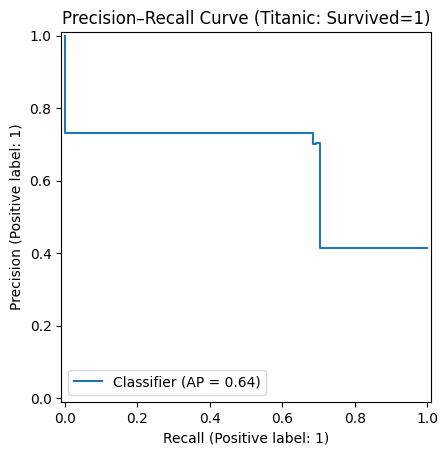

In [ ]:
#plot Precision–Recall Curve using sklearn
from sklearn.metrics import PrecisionRecallDisplay

# Predict probabilities for class 1 (Survived)
y_scores = full_tree.predict_proba(X_test)[:, 1]

# Create display object and plot
disp = PrecisionRecallDisplay.from_predictions(y_test, y_scores)
disp.ax_.set_title("Precision–Recall Curve (Titanic: Survived=1)")
plt.show()

•	Depth controls how far the tree can grow.
•	Leaf size controls how fine the final rules are.
•	Split size controls whether small groups can be split at all.


In [ ]:
prepruned_tree = DecisionTreeClassifier(
    random_state=42,
    max_depth=4,          # cap depth (strongest control)
    min_samples_leaf=3,   # smooth leaves
    min_samples_split=6,  # avoid splitting on tiny nodes
    # max_leaf_nodes=32,  # optional extra cap on complexity
    # max_features=None,  # optionally limit features per split
)
prepruned_tree.fit(X_train, y_train)

y_tr = prepruned_tree.predict(X_train)
y_te = prepruned_tree.predict(X_test)

print("Train acc:", round(accuracy_score(y_train, y_tr), 3))
print("Test  acc:", round(accuracy_score(y_test, y_te), 3))
print("Depth:", prepruned_tree.get_depth(), " Leaves:", prepruned_tree.get_n_leaves())
print("\nReport (test):\n", classification_report(y_test, y_te))

Train acc: 0.844
Test  acc: 0.821
Depth: 4  Leaves: 14

Report (test):
               precision    recall  f1-score   support

           0       0.82      0.89      0.85       157
           1       0.82      0.72      0.77       111

    accuracy                           0.82       268
   macro avg       0.82      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268



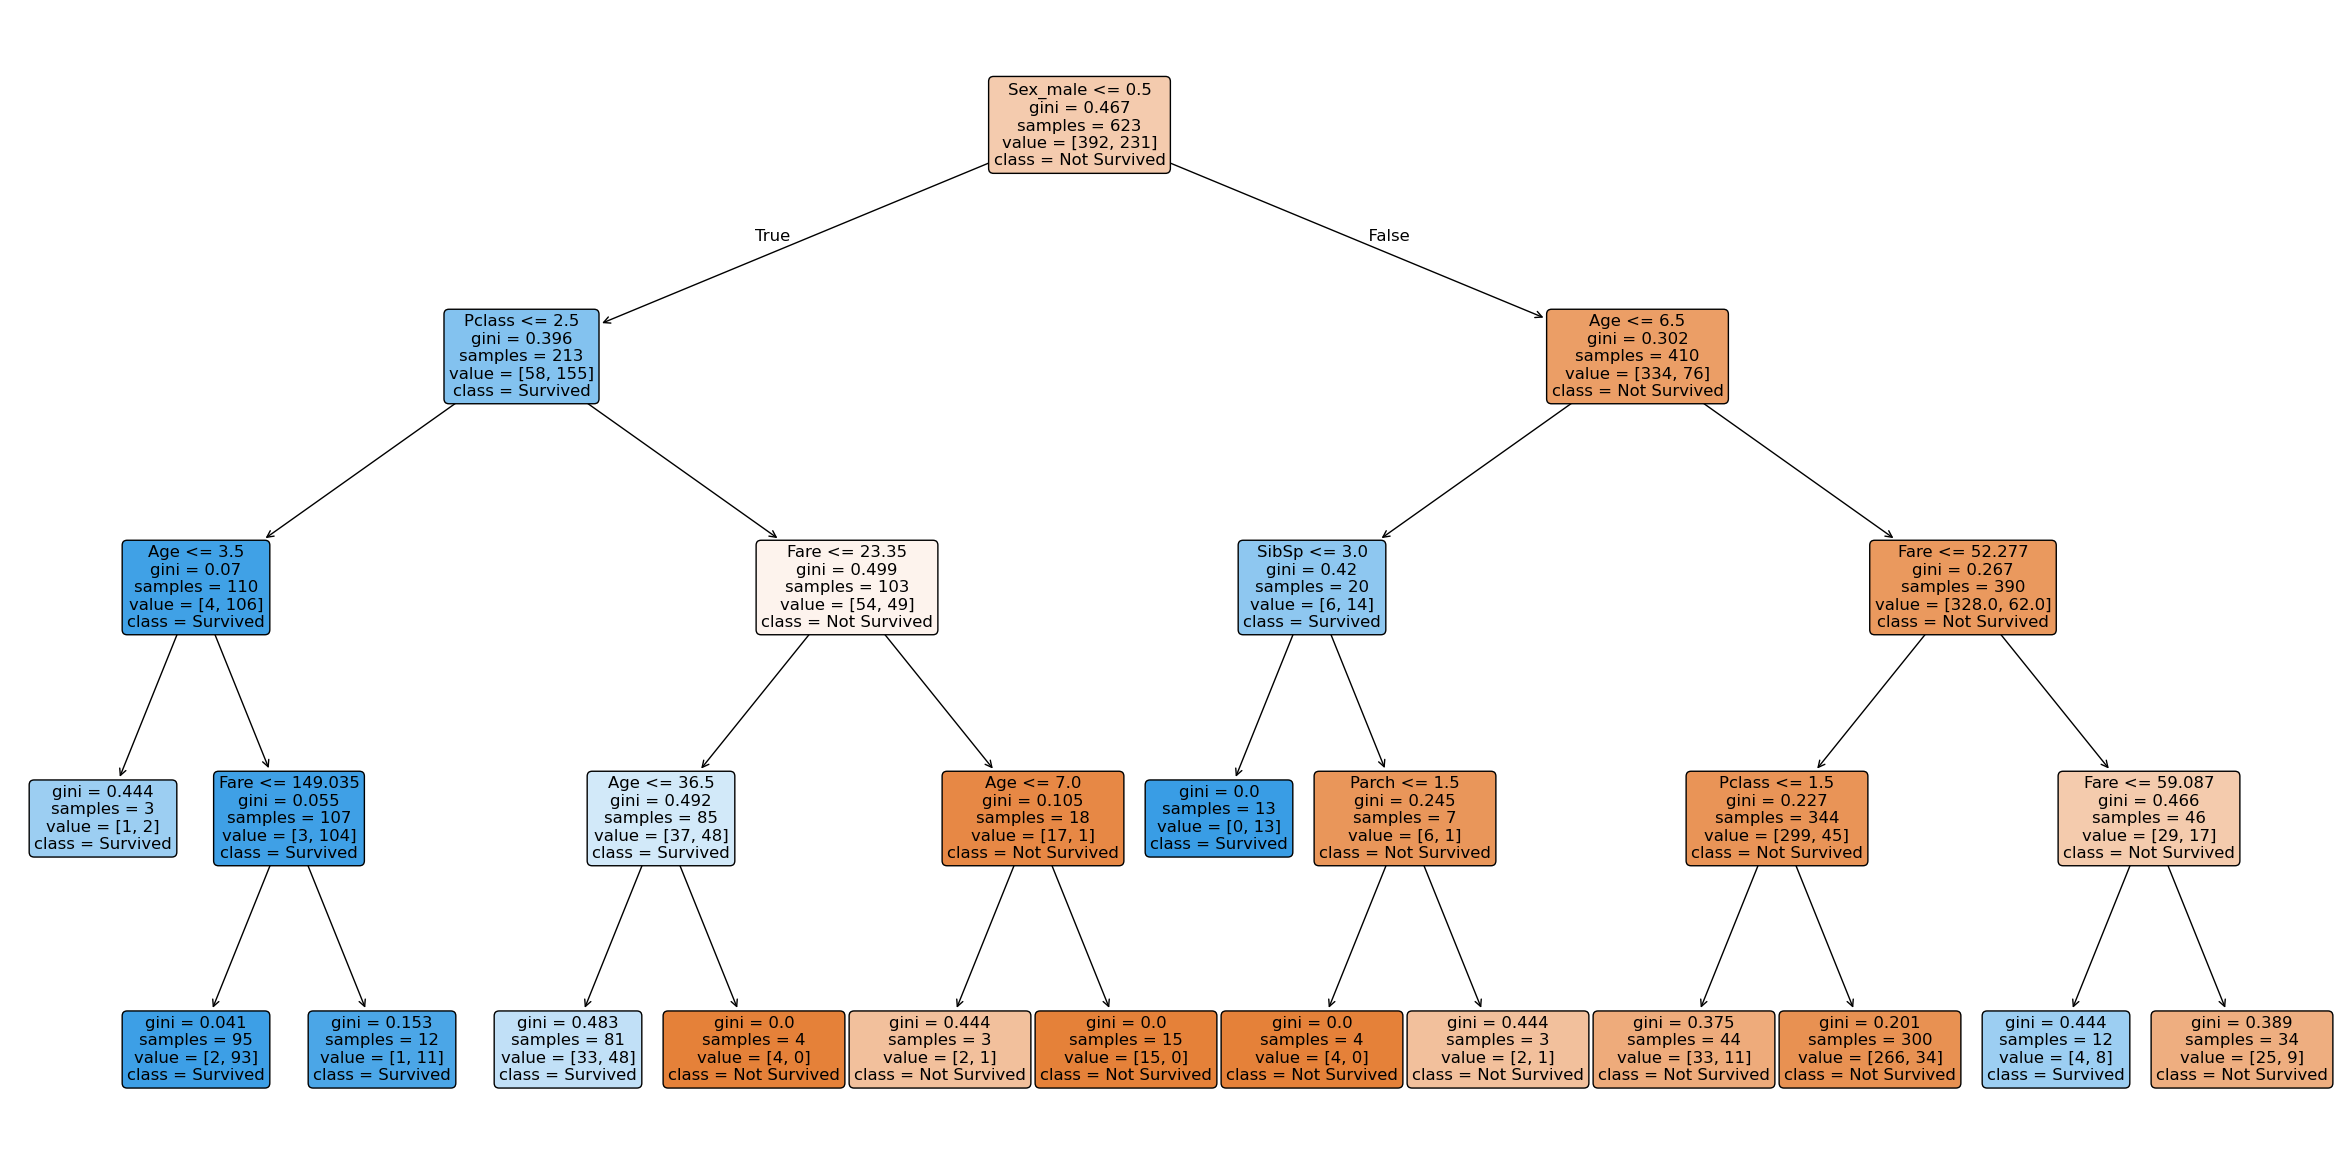

In [ ]:
#  plot the tree import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(30,15))  # make figure large
plot_tree(prepruned_tree,
          feature_names=X.columns,
          class_names=["Not Survived","Survived"],
          filled=True, rounded=True)
plt.show()

In [ ]:
#pre-pruning hyperparameters by cross-validation (still pre-pruning)

In [ ]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_grid = {
    "max_depth": [4, 5, 6, 7,8],
    "min_samples_leaf": [1, 2, 4, 6],
    "min_samples_split": [2, 4, 8, 12],
    "max_leaf_nodes": [None, 16, 32, 64]
}

grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    scoring="accuracy",
    cv=cv,
    n_jobs=-1
)
grid.fit(X_train, y_train)

best_tree = grid.best_estimator_
print("Best params:", grid.best_params_)
print("CV accuracy:", round(grid.best_score_, 3))
print("Test accuracy:", round(best_tree.score(X_test, y_test), 3))
print("Depth:", best_tree.get_depth(), "Leaves:", best_tree.get_n_leaves())

Best params: {'max_depth': 8, 'max_leaf_nodes': 16, 'min_samples_leaf': 4, 'min_samples_split': 12}
CV accuracy: 0.838
Test accuracy: 0.81
Depth: 8 Leaves: 16


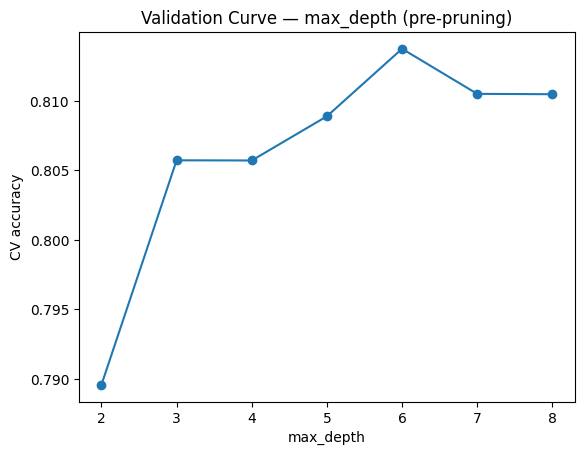

In [ ]:
#validation curve (bias–variance intuition)
from sklearn.model_selection import cross_val_score

depths = [2,3,4,5,6,7,8]
cv_means = []
for d in depths:
    clf = DecisionTreeClassifier(random_state=42, max_depth=d)
    scores = cross_val_score(clf, X_train, y_train, cv=cv, scoring="accuracy")
    cv_means.append(scores.mean())

plt.figure()
plt.plot(depths, cv_means, marker='o')
plt.xlabel("max_depth"); plt.ylabel("CV accuracy")
plt.title("Validation Curve — max_depth (pre-pruning)")
plt.show()

Answer following Data Preprocessing & Exploration questions for deeper understanding ?





Why do we drop columns like PassengerId, Name, Ticket, and Cabin before training the model?



Explain why stratify=y was used in train_test_split. What would happen to class balance if it was not included?

In the preprocessing step, we replaced missing values in Age with the median. What would happen if we used the mean instead? Which is more appropriate for skewed data?

Part B: Model Training & Evaluation

Train the DecisionTreeClassifier with different max_depth values (e.g., 2, 3, 5, 10).

Record the accuracy for both training and test data.

At what depth does overfitting start to appear? Explain with evidence from results.

The confusion matrix helps us evaluate classification performance.

Interpret the confusion matrix for your best model.

Which type of error (false positive vs. false negative) is more serious in predicting Titanic survival? Why?

Compare training accuracy and test accuracy for your decision tree.

What does a large gap between them indicate about model performance?

Which hyperparameters in DecisionTreeClassifier directly control pre-pruning? Explain the role of:

max_depth

min_samples_split

min_samples_leaf

max_features

Train decision trees with different values of max_depth (e.g., 2, 3, 5, 10, None).




Compare training and test accuracy.

At what depth does overfitting become evident?




Visualize the tree for max_depth=2 and max_depth=5.

Which tree is easier to interpret?




Fix max_depth=None and vary min_samples_split (2, 10, 20, 50).





How does increasing min_samples_split affect the complexity of the tree and accuracy?





Similarly, vary min_samples_leaf (1, 5, 10, 20).





How does this parameter prevent the tree from creating very specific rules based on small groups of samples?

Compare a tree trained with no pre-pruning (max_depth=None) to one with restrictions (max_depth=3, min_samples_leaf=5).

Which one has better generalization on X_test? Why?

Suppose your unrestricted tree achieves 100% training accuracy but low test accuracy.

Which pre-pruning parameter(s) would you adjust first to reduce overfitting?

Justify your choice.

If your dataset had many features (e.g., 50+), how would setting max_features help control overfitting?

Part D: Interpretation & Insights

Plot and analyze feature importances.

Which feature(s) contributed most to predicting survival?

Are these results consistent with your intuition or historical facts about Titanic survival?

Suppose we included the Cabin column (with many missing values).

How might this affect tree splits and feature importance?

Should we impute missing cabins, drop the column, or engineer a new feature (e.g., Cabin deck)? Justify your choice.

Part E: Critical Thinking

Decision Trees can perfectly memorize the training set if left unpruned. Why is this undesirable in real-world machine learning?

Compare Decision Trees with Logistic Regression for this classification problem.

Which model might generalize better? Why?

If the Titanic dataset had a severe class imbalance (e.g., 90% did not survive, 10% survived), what modifications to model training or evaluation would you suggest?

